In [1]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from IPython.display import Image
import pydotplus

In [2]:
#Loading the csv file on to the dataframe
df = pd.read_csv('census1994.csv')

In [3]:
# Dropping NAN va;ues from the dataframe
df_census_new = df.replace(regex='\?', value=np.nan)
df_new_census = df_census_new.dropna()
df_new_census['education-num']

0        13
1        13
2         9
3         7
4        13
5        14
6         5
7         9
8        14
9        13
10       10
11       13
12       13
13       12
15        4
16        9
17        9
18        7
19       14
20       16
21        9
22        5
23        7
24        9
25       13
26        9
28        9
29        9
30       12
31       10
         ..
32526     6
32527    10
32528     9
32529     9
32532    16
32533    13
32534    10
32535     8
32536    13
32537     9
32538    13
32540     9
32543    12
32544    14
32545    12
32546    12
32547     9
32548    15
32549    10
32550    10
32551     6
32552    11
32553    14
32554    14
32555    10
32556    12
32557     9
32558     9
32559     9
32560     9
Name: education-num, Length: 30162, dtype: int64

In [4]:
# Printing first five elements of the dataframe
df_new_census.head(5)

,Date,Age,WorkClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,class
0,3/20/1994,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1/14/1994,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,8/14/1994,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3/17/1994,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,9/20/1994,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Printing last five values of the dataframe
df_new_census.tail(5)

,Date,Age,WorkClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,class
32556,12/29/1994,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,1/30/1994,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,9/26/1994,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,4/5/1994,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,3/5/1994,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
# Printing the class values
print(df_new_census['class'])

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
5         <=50K
6         <=50K
7          >50K
8          >50K
9          >50K
10         >50K
11         >50K
12        <=50K
13        <=50K
15        <=50K
16        <=50K
17        <=50K
18        <=50K
19         >50K
20         >50K
21        <=50K
22        <=50K
23        <=50K
24        <=50K
25         >50K
26        <=50K
28        <=50K
29        <=50K
30        <=50K
31        <=50K
          ...  
32526     <=50K
32527     <=50K
32528     <=50K
32529     <=50K
32532      >50K
32533      >50K
32534     <=50K
32535     <=50K
32536      >50K
32537     <=50K
32538      >50K
32540     <=50K
32543     <=50K
32544     <=50K
32545      >50K
32546     <=50K
32547     <=50K
32548     <=50K
32549     <=50K
32550     <=50K
32551     <=50K
32552     <=50K
32553     <=50K
32554      >50K
32555     <=50K
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: class, Length: 301

In [7]:
# Starting convertion of categorical variables to numerical values
x = df_new_census.iloc[:, 0:16]
y = df_new_census['class'].str.strip()
for i,j in x.iterrows():
    j = j.str.strip()

In [8]:
# Converting categorical data values to numerical data values using Labelencoder for class aattribute and selecting two attributes for running Decision Tree model
lb_make = LabelEncoder()
y_class = lb_make.fit_transform(y)
accuracies = []

In [9]:
# Converting categorical data values to numerical data values using Labelencoder for all categorical aattributes
x1 = df_new_census['marital-status']
x2 = df_new_census['WorkClass']
x3 = df_new_census['education']
x4 = df_new_census['occupation']
x5 = df_new_census['relationship']
x6 = df_new_census['race']
x7 = df_new_census['gender']
x8 = df_new_census['native-country']
x9 = df_new_census['Date']
x10 = df_new_census['class']
x1_class = lb_make.fit_transform(x1)
x2_class = lb_make.fit_transform(x2)
x3_class = lb_make.fit_transform(x3)
x4_class = lb_make.fit_transform(x4)
x5_class = lb_make.fit_transform(x5)
x6_class = lb_make.fit_transform(x6)
x7_class = lb_make.fit_transform(x7)
x8_class = lb_make.fit_transform(x8)
x9_class = lb_make.fit_transform(x9)
x10_class = lb_make.fit_transform(x10)
df_copy = df_new_census.copy()
df_copy['WorkClass'] = x2_class
df_copy['marital-status'] = x1_class
df_copy['education'] = x3_class
df_copy['occupation'] = x4_class
df_copy['relationship'] = x5_class
df_copy['race'] = x6_class
df_copy['gender'] = x7_class
df_copy['native-country'] = x8_class
df_copy['Date'] = x9_class
df_copy['class'] = x10_class


In [10]:
# Splitting dataset into train and test data set in the ratio 70:30 and replacing missing values with mean
X_train, X_test, Y_train, Y_test = train_test_split(df_copy.iloc[:, 1:15], y, test_size=0.3, random_state = 0)
mean_test = X_test['education-num'].mean()
mean_train = X_train['education-num'].mean()
X_test['education-num'] = X_test['education-num'].replace(np.nan, mean_test)
X_train['education-num'] = X_train['education-num'].replace(np.nan, mean_train)

In [11]:
# Instantiating DT model using entropy as metric
classifier = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [12]:
# fitting the model and predicting y_pred
'''
new_x_test = np.array(x_test)
des_train_arr = np.reshape(new_x, (-1, 1))
des_test_arr = np.reshape(new_x_test, (-1, 1))
new_x = np.array(x_train)
'''

classifier.fit(X_train, Y_train)
#r = tree.export_text(Classifier, feature_names='Age')
y_pred = classifier.predict(X_test)

In [13]:
y_pred #displaying the classes in y_pred

array(['<=50K', '<=50K', '>50K', ..., '>50K', '<=50K', '<=50K'],
      dtype=object)

In [14]:
# calculation of the accuracy 
accuracy = classifier.score(X_test, Y_test)
print(accuracy * 100, '%')

80.45087855011603 %


In [15]:
# calculation of the confusion matrix and parameters precision, recall, support
cm = confusion_matrix(Y_test, y_pred)
precision = cm[0][0] / (cm[0][0] + cm[1][0])
recall = cm[0][0] / (cm[0][0] + cm[0][1])
f1_score = (2*cm[0][0]) / ((2*cm[0][0]) + cm[0][1] + cm[1][0])
support = df_new_census['class'].value_counts()

In [16]:
# Printing confusion matirx
print(cm)

[[5880  884]
 [ 885 1400]]


In [17]:
# printing classification report
cr = classification_report(Y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       <=50K       0.87      0.87      0.87      6764
        >50K       0.61      0.61      0.61      2285

    accuracy                           0.80      9049
   macro avg       0.74      0.74      0.74      9049
weighted avg       0.80      0.80      0.80      9049



In [18]:
# Printing parameters of the classification report
print("Accuracy: ", accuracy*100, '%')
print("Confusion Matrix: \n", cm)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1_score)
print("Support: ", support)

Accuracy:  80.45087855011603 %
Confusion Matrix: 
 [[5880  884]
 [ 885 1400]]
Precision:  0.8691796008869179
Recall:  0.8693081017149615
F1-score:  0.8692438465518516
Support:   <=50K    22654
 >50K      7508
Name: class, dtype: int64


In [19]:

accuracies.append(accuracy)

In [20]:
# importing graphviz and deriving the rules of the DT
import graphviz
list_features = [X for X in df_new_census.columns]
one_feat = np.array(list_features[1])
uniq_array = np.unique(list_features[1])
cl_names = np.unique(y)
list_features.remove('Date')
r = tree.export_text(classifier, feature_names=list_features[:14])
print(uniq_array)

['Age']


In [21]:
# Printing the rules and plotting DT with max depth = 5
print(r)
cf = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth = 5)
cf.fit(X_train, Y_train)
#r = tree.export_text(Classifier, feature_names='Age')
y_pred = cf.predict(X_test)

|--- relationship <= 0.50
|   |--- education-num <= 12.50
|   |   |--- capital-gain <= 5095.50
|   |   |   |--- education-num <= 7.50
|   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |--- WorkClass <= 2.50
|   |   |   |   |   |   |--- occupation <= 3.50
|   |   |   |   |   |   |   |--- race <= 2.50
|   |   |   |   |   |   |   |   |--- class: >50K
|   |   |   |   |   |   |   |--- race >  2.50
|   |   |   |   |   |   |   |   |--- hours-per-week <= 49.00
|   |   |   |   |   |   |   |   |   |--- education <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Age <= 31.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: <=50K
|   |   |   |   |   |   |   |   |   |   |--- Age >  31.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- education >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: <=50K
|   |   |   |   |   |   |   |   |--- hours-per-week >  49.00
|   |   |   |   |   |   |   |   |   |--- hours-

In [22]:
# Calling the graphviz to plot the DT
f = tree.export_graphviz(
            cf,
            out_file =  None,
            feature_names = list_features[:14],
            class_names = cl_names,
            filled = True,
            rounded = True)

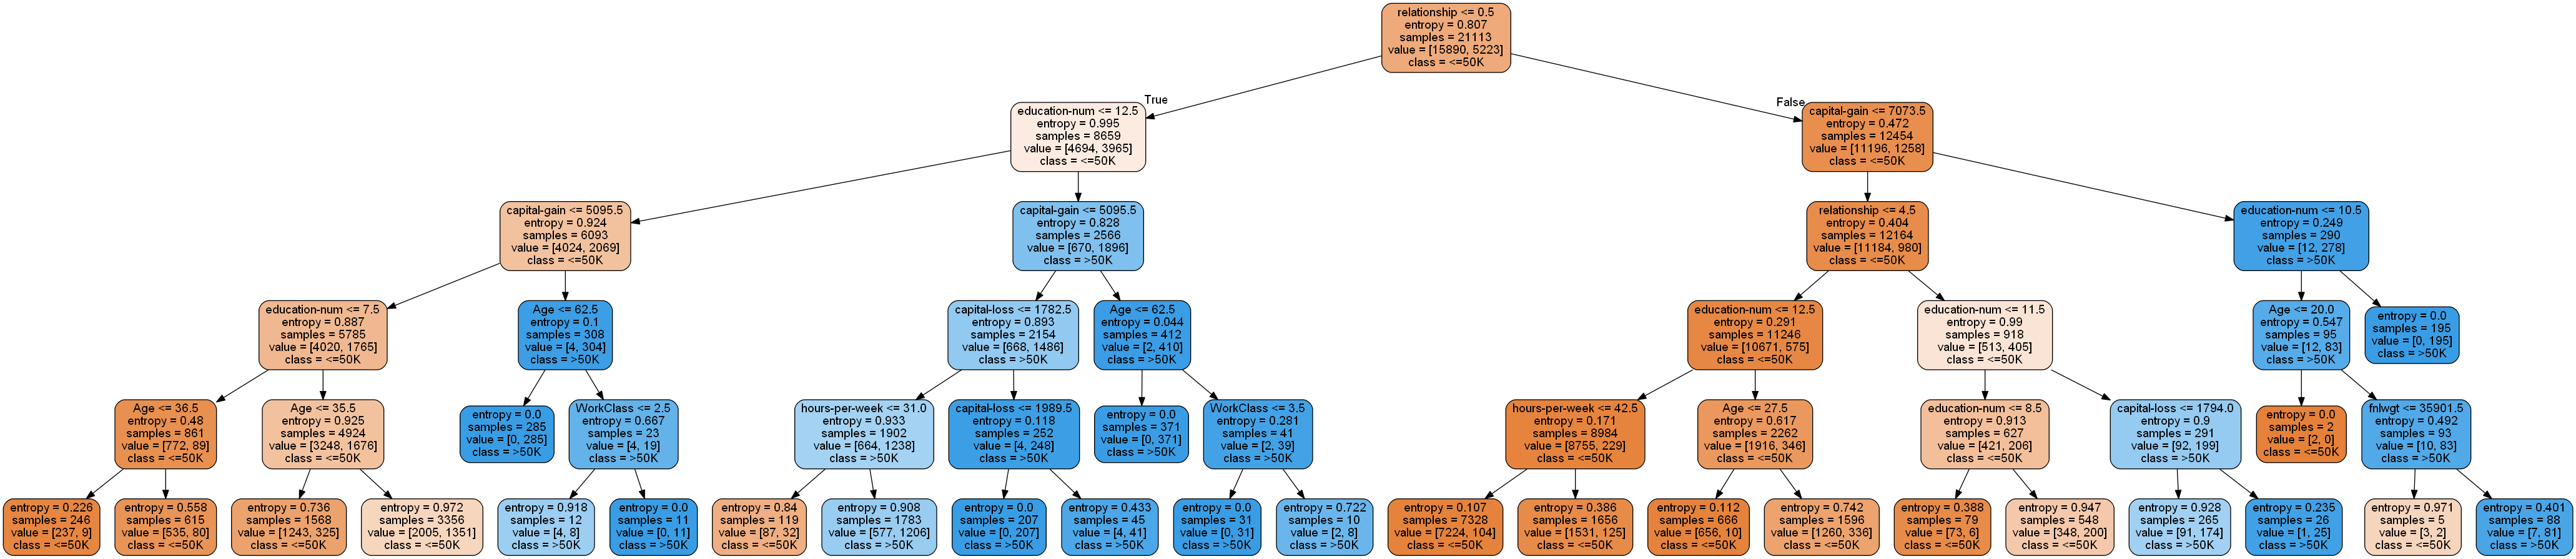

<Figure size 7200x7200 with 0 Axes>

In [23]:
# Plotting the DT
plt.figure(figsize=(100,100))
graph = pydotplus.graph_from_dot_data(f)
Image(graph.create_png())

In [24]:
# Instantiating DT model using gini as metric
clf = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 0)

In [25]:
# fitting the model and predicting y_pred
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [26]:
y_pred_one = clf.predict(X_test)

In [27]:
# Printing the rules OF THE DT
y_pred_one
rule = tree.export_text(clf, feature_names=list_features[:14])
print(rule)

|--- relationship <= 0.50
|   |--- education-num <= 12.50
|   |   |--- capital-gain <= 5095.50
|   |   |   |--- capital-loss <= 1782.50
|   |   |   |   |--- education-num <= 7.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- hours-per-week <= 49.00
|   |   |   |   |   |   |   |--- education <= 0.50
|   |   |   |   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |   |   |   |--- class: <=50K
|   |   |   |   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |   |   |   |--- hours-per-week <= 37.50
|   |   |   |   |   |   |   |   |   |   |--- class: >50K
|   |   |   |   |   |   |   |   |   |--- hours-per-week >  37.50
|   |   |   |   |   |   |   |   |   |   |--- fnlwgt <= 377552.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- fnlwgt >  377552.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |--- education >  0.50
|  

In [28]:
# calculating the accuracy of DT using gini as metric
accuracy_gini = clf.score(X_test, Y_test)
accuracies.append(accuracy_gini)

In [29]:
accuracy_gini * 100

80.28511437727926

In [30]:
# Printing the confusion matrix
cg = confusion_matrix(Y_test, y_pred_one)
print(cg)
cs = classification_report(Y_test, y_pred_one)
print(cs)

[[5870  894]
 [ 890 1395]]
              precision    recall  f1-score   support

       <=50K       0.87      0.87      0.87      6764
        >50K       0.61      0.61      0.61      2285

    accuracy                           0.80      9049
   macro avg       0.74      0.74      0.74      9049
weighted avg       0.80      0.80      0.80      9049



In [31]:
print(cg)


[[5870  894]
 [ 890 1395]]


In [32]:
# Plotting the graph of the tree where max depth = 5
cfl = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth = 5)
cfl.fit(X_train, Y_train)
#r = tree.export_text(Classifier, feature_names='Age')
y_pred = cfl.predict(X_test)

In [33]:
b = tree.export_graphviz(
            cfl,
            out_file =  None,
            feature_names = list_features[:14],
            class_names = cl_names,
            filled = True,
            rounded = True)

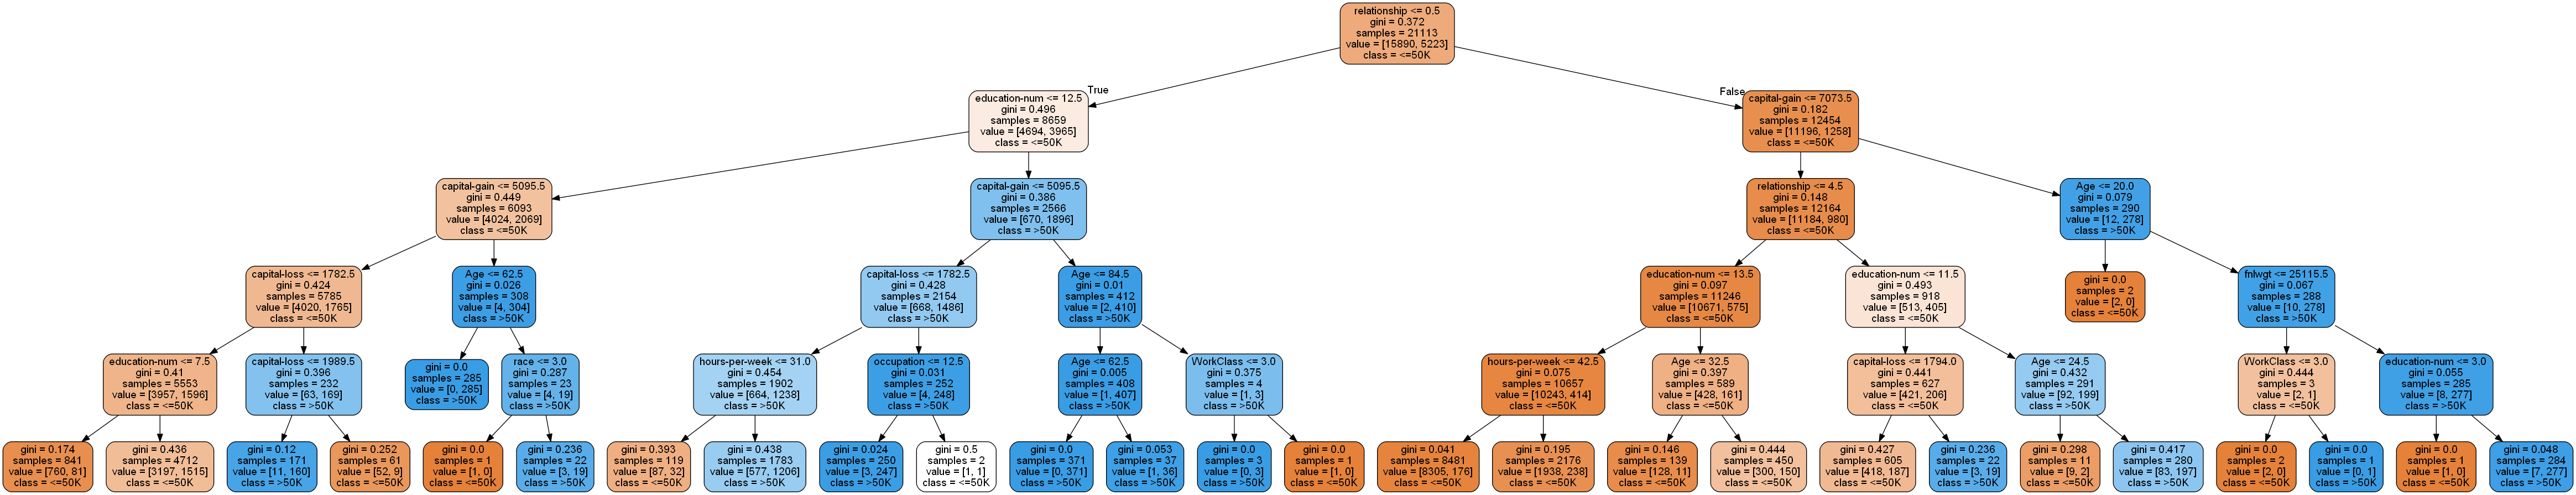

<Figure size 7200x7200 with 0 Axes>

In [34]:
plt.figure(figsize=(100,100))
graph = pydotplus.graph_from_dot_data(b)
Image(graph.create_png())

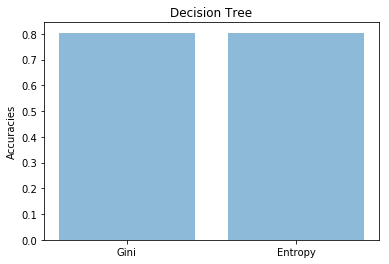

In [35]:
# Comparing the accuracies of the DT's for metrics gini and entropy
plt.bar(['Gini','Entropy'], accuracies, align='center', alpha=0.5)
plt.xticks(['Gini','Entropy'])
plt.ylabel('Accuracies')
plt.title('Decision Tree')
plt.show()